In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')
df = pd.merge(exercise, calories, on = 'User_ID')
df = df[df['Calories'] < 300]
df = df.reset_index()
df['Intercept'] = 1
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


In [3]:
df.shape

(14998, 11)

In [4]:
exercise.shape

(15000, 8)

In [5]:
calories.shape

(15000, 2)

In [6]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
calories.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [11]:
calories['Calories'].count()

15000

In [14]:
X = df.loc[:, ['Intercept', 'Duration']]
y = df.loc[:, 'Calories']

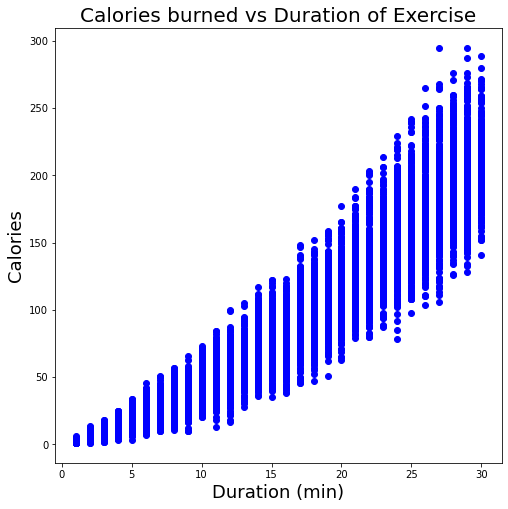

In [15]:
plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'bo');
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [19]:
#split dataset in train and testing set   
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=10,random_state=0)  

In [20]:
from sklearn.linear_model import LinearRegression  
regressor=LinearRegression()  
regressor.fit(X_train,Y_train)  
y_pre=regressor.predict(X_test)  

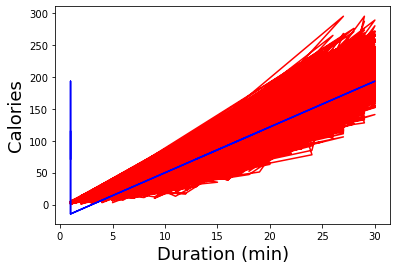

In [27]:
# Visualising the Training set results in a scatter plot

plt.plot(df['Duration'], df['Calories'], color='red');
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
#plt.plot(df['Duration'], df['Calories'], 'bo',label = 'observations', alpha = 0.8);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 



In [29]:
# coefficeints of the trained model
print('\nCoefficient of model :', regressor.coef_)
# intercept of the model
print('\nIntercept of model',regressor.intercept_)


Coefficient of model : [0.         7.17007652]

Intercept of model -21.834217302640184


In [30]:
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(Y_train,regressor.predict(X_train))**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  18.388581291788572


In [31]:
# predict the target on the testing dataset
predict_test = regressor.predict(X_test) 

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(Y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  10.46705882981965


## Assumptions in Regression
**Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions. Therefore, for a successful regression analysis, it’s essential to validate these assumptions.**

So, how would you check (validate) if a data set follows all regression assumptions? You check it using the regression plots (explained below) along with some statistical test.

Let’s look at the important assumptions in regression analysis:

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

### With Complete data

In [32]:
df.columns

Index(['index', 'User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'Intercept'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       14998 non-null  int64  
 1   User_ID     14998 non-null  int64  
 2   Gender      14998 non-null  object 
 3   Age         14998 non-null  int64  
 4   Height      14998 non-null  float64
 5   Weight      14998 non-null  float64
 6   Duration    14998 non-null  float64
 7   Heart_Rate  14998 non-null  float64
 8   Body_Temp   14998 non-null  float64
 9   Calories    14998 non-null  float64
 10  Intercept   14998 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 1.3+ MB


In [38]:
X = df.loc[:, ['Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp']]
dummy = pd.get_dummies(X['Gender'])
X = pd.concat([X,dummy], axis =1)
X = X.drop(['Gender'], axis =1)

y = df.loc[:, 'Calories']

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         14998 non-null  int64  
 1   Height      14998 non-null  float64
 2   Weight      14998 non-null  float64
 3   Duration    14998 non-null  float64
 4   Heart_Rate  14998 non-null  float64
 5   Body_Temp   14998 non-null  float64
 6   female      14998 non-null  uint8  
 7   male        14998 non-null  uint8  
dtypes: float64(5), int64(1), uint8(2)
memory usage: 732.4 KB


In [44]:
X.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female
0,68,190.0,94.0,29.0,105.0,40.8,0
1,20,166.0,60.0,14.0,94.0,40.3,1
2,69,179.0,79.0,5.0,88.0,38.7,0
3,34,179.0,71.0,13.0,100.0,40.5,1
4,27,154.0,58.0,10.0,81.0,39.8,1


In [80]:
X.isna().sum().sum()

0

In [41]:
X.drop(['male'], axis=1, inplace=True)

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=300,random_state=0)  

In [49]:
X_test.shape

(300, 7)

In [50]:
regressor=LinearRegression()  
regressor.fit(X_train,Y_train)  
y_pre=regressor.predict(X_test)  

In [58]:
# coefficeints of the trained model
print('\nCoefficient of model :','\n', list(X.columns),'\n',regressor.coef_)
# intercept of the model
print('\nIntercept of model',regressor.intercept_)

rmse_train = mean_squared_error(Y_train,regressor.predict(X_train))**(0.5)
print('\nRMSE on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = regressor.predict(X_test) 

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(Y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)

r2 = regressor.score(X_train, Y_train)
print('R^2: {0}'.format(r2))


Coefficient of model : 
 ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'female'] 
 [  0.49900453  -0.18280117   0.29858231   6.63963295   1.98204156
 -16.93791736   1.27484015]

Intercept of model 462.5334075342207

RMSE on train dataset :  11.255601898891099

RMSE on test dataset :  12.335032579186658
R^2: 0.9674181906658481


In [59]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [63]:
# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(X.shape[1])]

In [64]:
linear_feature_names

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

In [66]:
calculate_residuals(regressor,X_train, Y_train)

,Actual,Predicted,Residuals
220,257.0,216.402539,40.597461
1520,102.0,108.571703,-6.571703
10980,67.0,78.493159,-11.493159
5849,85.0,88.037297,-3.037297
5078,90.0,94.047607,-4.047607
...,...,...,...
13123,113.0,111.447775,1.552225
3264,56.0,70.854473,-14.854473
9845,80.0,86.602400,-6.602400
10799,40.0,47.820883,-7.820883


In [86]:


r = scipy.stats.linregress(X.iloc[:,1],y)

df1 = pd.DataFrame(r._asdict(), index=[0])
print(df)

       index   User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0          0  14733363    male   68   190.0    94.0      29.0       105.0   
1          1  14861698  female   20   166.0    60.0      14.0        94.0   
2          2  11179863    male   69   179.0    79.0       5.0        88.0   
3          3  16180408  female   34   179.0    71.0      13.0       100.0   
4          4  17771927  female   27   154.0    58.0      10.0        81.0   
...      ...       ...     ...  ...     ...     ...       ...         ...   
14993  14995  15644082  female   20   193.0    86.0      11.0        92.0   
14994  14996  17212577  female   27   165.0    65.0       6.0        85.0   
14995  14997  17271188  female   43   159.0    58.0      16.0        90.0   
14996  14998  18643037    male   78   193.0    97.0       2.0        84.0   
14997  14999  11751526    male   63   173.0    79.0      18.0        92.0   

       Body_Temp  Calories  Intercept  
0           40.8     231.0         

### What if these assumptions get violated ?

1. **Linear and Additive:**  If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set.

 **How to check: Look for residual vs fitted value plots (explained below). Also, you can include polynomial terms (X, X², X³) in your model to capture the non-linear effect.**

#### 2. Autocorrelation: The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

If this happens, it causes confidence intervals and prediction intervals to be narrower. Narrower confidence interval means that a 95% confidence interval would have lesser probability than 0.95 that it would contain the actual value of coefficients. Let’s understand narrow prediction intervals with an example:

For example, the least square coefficient of X¹ is 15.02 and its standard error is 2.08 (without autocorrelation). But in presence of autocorrelation, the standard error reduces to 1.20. As a result, the prediction interval narrows down to (13.82, 16.22) from (12.94, 17.10).

Also, lower standard errors would cause the associated p-values to be lower than actual. This will make us incorrectly conclude a parameter to be statistically significant.

How to check: Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.

#### 3. Multicollinearity: This phenomenon exists when the independent variables are found to be moderately or highly correlated. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.

Another point, with presence of correlated predictors, the standard errors tend to increase. And, with large standard errors, the confidence interval becomes wider leading to less precise estimates of slope parameters.

Also, when predictors are correlated, the estimated regression coefficient of a correlated variable depends on which other predictors are available in the model. If this happens, you’ll end up with an incorrect conclusion that a variable strongly / weakly affects target variable. Since, even if you drop one correlated variable from the model, its estimated regression coefficients would change. That’s not good!

How to check: You can use scatter plot to visualize correlation effect among variables. Also, you can also use VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

 

#### 4. Heteroskedasticity: The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Look like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

How to check: You can look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern (shown in next section). Also, you can use Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.

#### 5. Normal Distribution of error terms: If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Presence of non – normal distribution suggests that there are a few unusual data points which must be studied closely to make a better model.

How to check: You can look at QQ plot (shown below). You can also perform statistical tests of normality such as Kolmogorov-Smirnov test, Shapiro-Wilk test.

 

In [67]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


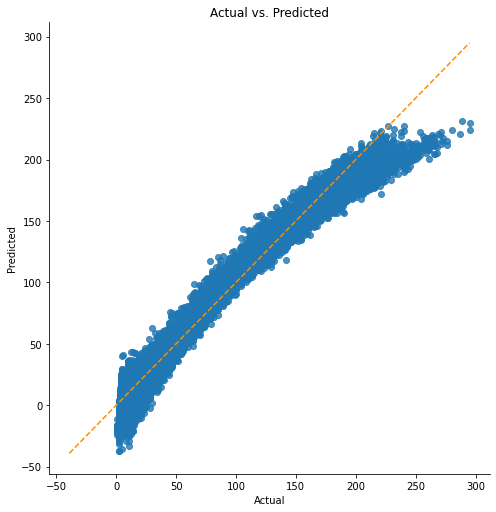

In [68]:
linear_assumption(regressor, X_train, Y_train)

In [128]:
temp = pd.DataFrame(X['Duration'])
temp.head()

,Duration
0,29.0
1,14.0
2,5.0
3,13.0
4,10.0


In [ ]:
for c in enumerate (['Gender', 'Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp']):
    temp = pd.DataFrame(X[c])
    X_train,X_test,Y_train,Y_test=train_test_split(temp,y,test_size=300,random_state=0)
    linear_assumption(regressor.fit(X_train,Y_train), pd.DataFrame(X_train), Y_train)
    

In [147]:
X_train.head()

,Duration
220,29.0
1520,14.0
10980,15.0
5849,12.0
5078,17.0


In [153]:
class DataAnalysis():
    def __init__(self, X_train, X_test):
        self.X_train = X_train # Train set
        self.X_test = X_test # Test set

    def multi_scatter(self,x_list, y):
        sns.set(style='whitegrid', rc={"grid.linewidth": 0.2})
        sns.set_context("paper", font_scale=2)  
        for x in range(0, len(x_list)):
            if x == 0 or x % 3:
                chart = sns.pairplot(data=self.X_train,
                y_vars=[y],
                x_vars=[x_list[x], x_list[x+1], x_list[x+2]],
                height = 10)
                plt.xticks(rotation = 45)
                plt.show()
            else:
                continue

In [156]:
X_train,X_test,Y_train,Y_test=train_test_split(temp,y,test_size=300,random_state=0)
DataAnalysis(X_train,X_test)

In [157]:
df.columns

Index(['index', 'User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'Intercept'],
      dtype='object')

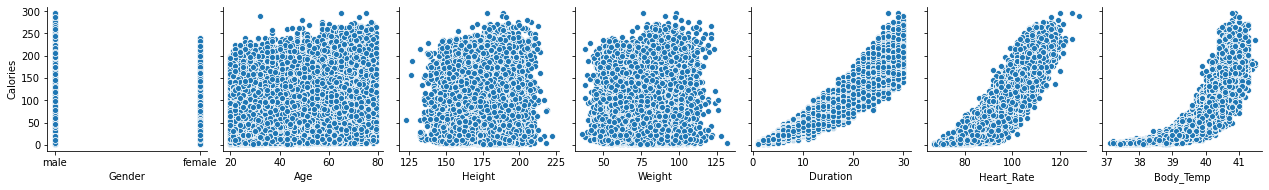

In [158]:
import seaborn as sns
pp = sns.pairplot(data=df,
                  y_vars=['Calories'],
                  x_vars=[ 'Gender', 'Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp'])

IndexError: index 3 is out of bounds for axis 0 with size 3

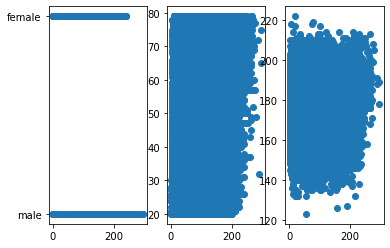

In [160]:
fig, axes = plt.subplots(ncols=3)
for i, yvar in enumerate(['Gender', 'Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp']):
    axes[i].scatter(df['Calories'],df[yvar])

In [81]:
X = X.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [91]:
type(X)

pandas.core.frame.DataFrame

In [82]:
for features in X.columns:
    #X_train,X_test,Y_train,Y_test=train_test_split(X[features],y,test_size=300,random_state=0)  
    regressor=LinearRegression()  
    #print(type(X_train))
    regressor.fit(X,y)  
    #regressor.fit(X_train,Y_train)  
    '''
    y_pre=regressor.predict(X_test)
    # coefficeints of the trained model
    print('\nCoefficient of model :','\n', features,'\n',regressor.coef_)
    # intercept of the model
    print('\nIntercept of model',regressor.intercept_)

    rmse_train = mean_squared_error(Y_train,regressor.predict(X_train))**(0.5)
    print('\nRMSE on train dataset : ', rmse_train)

    # predict the target on the testing dataset
    predict_test = regressor.predict(X_test) 

    # Root Mean Squared Error on testing dataset
    rmse_test = mean_squared_error(Y_test,predict_test)**(0.5)
    print('\nRMSE on test dataset : ', rmse_test)

    r2 = regressor.score(X_train, Y_train)
    print('R^2: {0}'.format(r2))
    '''

In [167]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
#from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [169]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 14998
Total number of columns in dataset = 11


In [170]:
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


In [171]:
X.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female
0,68,190.0,94.0,29.0,105.0,40.8,0
1,20,166.0,60.0,14.0,94.0,40.3,1
2,69,179.0,79.0,5.0,88.0,38.7,0
3,34,179.0,71.0,13.0,100.0,40.5,1
4,27,154.0,58.0,10.0,81.0,39.8,1


In [172]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Linear regression using statmodel

In [174]:
X_with_constant = sm.add_constant(X_train)
X_with_constant.head()

,const,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female
5896,1.0,23,187.0,87.0,27.0,102.0,40.3,0
13109,1.0,41,175.0,83.0,30.0,108.0,41.0,0
1572,1.0,37,165.0,64.0,15.0,90.0,40.1,1
12993,1.0,29,193.0,92.0,4.0,85.0,39.0,0
879,1.0,54,169.0,66.0,6.0,85.0,39.4,1


In [179]:
model = sm.OLS(y_train, X_with_constant)
results = model.fit()
results.params

const         465.619563
Age             0.505289
Height         -0.199117
Weight          0.320693
Duration        6.650942
Heart_Rate      1.987812
Body_Temp     -17.008706
female          1.261595
dtype: float64

In [180]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 4.449e+04
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:04:46   Log-Likelihood:                -40341.
No. Observations:               10498   AIC:                         8.070e+04
Df Residuals:                   10490   BIC:                         8.076e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        465.6196     13.257     35.124      0.0

In [181]:
X_test = sm.add_constant(X_test)

In [182]:
y_pred = results.predict(X_test)

In [184]:
residuals = y_test - y_pred
residuals

13412   -11.073483
6472      0.693684
9967    -12.412636
862      -9.076301
5967     22.387362
           ...    
13387     9.995897
14895     7.541933
5688     10.498422
4872      2.909082
12224   -17.723472
Length: 4500, dtype: float64

#### multicolinearity test

In [186]:
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index= X_train.columns).T

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female
vif,8.175576,2079.666352,471.895165,14.209841,363.875289,1058.11851,5.658571


As we can see from above Height, Weight Heart_rate and BOdy_Temp has high VIF values so there is multicolinearity in the data

In [187]:
X_train = X_train.drop(['Height'], axis =1)
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index= X_train.columns).T

,Age,Weight,Duration,Heart_Rate,Body_Temp,female
vif,7.486183,67.40673,12.978448,363.375237,365.842513,5.217061


In [188]:
X_train = X_train.drop(['Body_Temp'], axis =1)
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index= X_train.columns).T

,Age,Weight,Duration,Heart_Rate,female
vif,7.44424,52.481545,8.919547,98.282377,4.330556


In [189]:
X_train = X_train.drop(['Heart_Rate'], axis =1)
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index= X_train.columns).T

,Age,Weight,Duration,female
vif,7.354078,8.56961,4.322976,1.890726


Now we can see from the above values that all are below 10 so there is no multicolinearity in the dataset.

### Normality of Residuals

<AxesSubplot:>

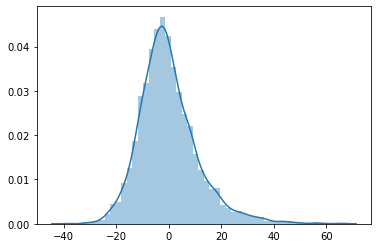

In [190]:
sns.distplot(residuals)

We can see the data residual are normally distributed around 0.

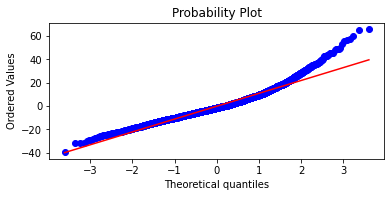

In [192]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)

In [193]:
np.mean(residuals)

-0.11246155171110216

### Again running the LR model with new data

In [196]:
X_with_constant = sm.add_constant(X_train)
#X_with_constant.head()
model = sm.OLS(y_train, X_with_constant)
results = model.fit()
results.params
print(results.summary())

X_test = X_test.drop(['Height', 'Body_Temp', 'Heart_Rate'], axis =1)

X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
residuals = y_test - y_pred

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 3.713e+04
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:19:50   Log-Likelihood:                -44044.
No. Observations:               10498   AIC:                         8.810e+04
Df Residuals:                   10493   BIC:                         8.814e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.2334      1.513    -35.194      0.0

<AxesSubplot:>

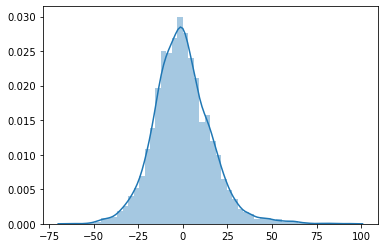

In [197]:
sns.distplot(residuals)


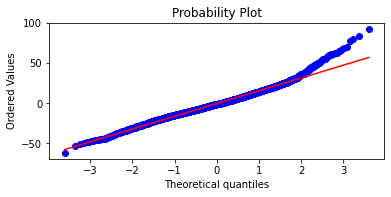

In [198]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)

In [199]:
np.mean(residuals)

-0.33329224219931924

### Homoscedasticity

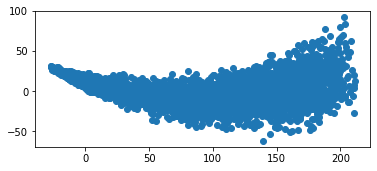

In [201]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residuals)

### No autocorrelation of residuals

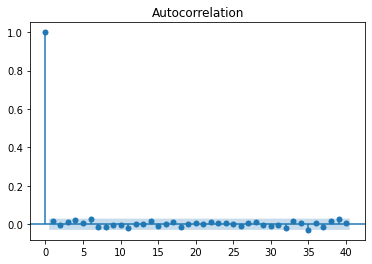

In [202]:
acf = smt.graphics.plot_acf(residuals, lags=40 , alpha=0.05)
acf.show()

#### Only correlation to self is there but all other in the range.